In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [5]:
data_path = os.getcwd() + "\Data\Transformed_Data\\forwards_midfielders_correlated.csv"

df = pd.read_csv(data_path)
df.head()

,Season,name,position,team,total_points,bps,influence,goals_scored,ict_index,bonus,threat,minutes,creativity,assists,value,clean_sheets,selected
0,2021-22,David de Gea,GK,Man Utd,2,17,34.4,0,3.4,0,0.0,90,0.0,0,50,0,473518
1,2021-22,Mattéo Guendouzi,MID,Arsenal,0,0,0.0,0,0.0,0,0.0,0,0.0,0,45,0,102
2,2021-22,Amad Diallo,MID,Man Utd,0,0,0.0,0,0.0,0,0.0,0,0.0,0,50,0,0
3,2021-22,Tom Heaton,GK,Man Utd,0,0,0.0,0,0.0,0,0.0,0,0.0,0,40,0,42318
4,2021-22,Alex Nicolao Telles,DEF,Man Utd,1,12,13.8,0,4.4,0,4.0,90,26.3,0,50,0,9011


<AxesSubplot:>

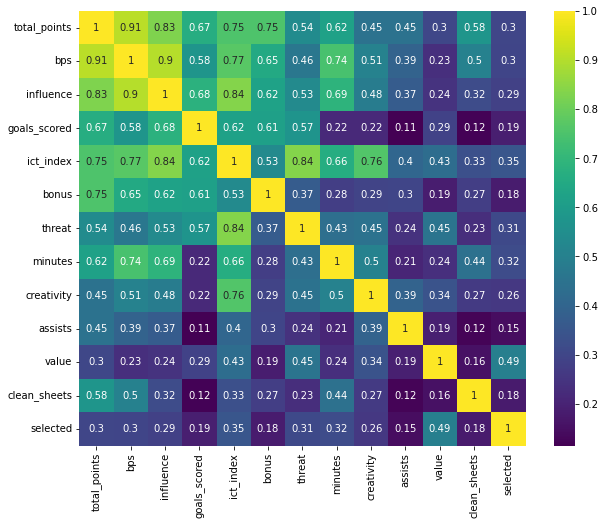

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81726 entries, 0 to 81725
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Season        81726 non-null  object 
 1   name          81726 non-null  object 
 2   position      81726 non-null  object 
 3   team          81726 non-null  object 
 4   total_points  81726 non-null  int64  
 5   bps           81726 non-null  int64  
 6   influence     81726 non-null  float64
 7   goals_scored  81726 non-null  int64  
 8   ict_index     81726 non-null  float64
 9   bonus         81726 non-null  int64  
 10  threat        81726 non-null  float64
 11  minutes       81726 non-null  int64  
 12  creativity    81726 non-null  float64
 13  assists       81726 non-null  int64  
 14  value         81726 non-null  int64  
 15  clean_sheets  81726 non-null  int64  
 16  selected      81726 non-null  int64  
dtypes: float64(4), int64(9), object(4)
memory usage: 10.6+ MB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_points,81726.0,1.610222,2.690565,-7.0,0.0,0.0,2.0,29.0
bps,81726.0,7.153758,10.390298,-18.0,0.0,0.0,13.0,114.0
influence,81726.0,8.606387,13.768351,0.0,0.0,0.0,13.8,163.6
goals_scored,81726.0,0.053618,0.252998,0.0,0.0,0.0,0.0,4.0
ict_index,81726.0,2.061147,3.263161,0.0,0.0,0.1,3.0,35.8
bonus,81726.0,0.128148,0.531618,0.0,0.0,0.0,0.0,3.0
threat,81726.0,6.417040,14.784794,0.0,0.0,0.0,4.0,186.0
minutes,81726.0,37.958226,41.734968,0.0,0.0,7.0,90.0,90.0
creativity,81726.0,5.598570,11.494845,0.0,0.0,0.0,4.8,170.9
assists,81726.0,0.047574,0.231268,0.0,0.0,0.0,0.0,4.0


Let's look at the distribution of total points.

C:\Users\GV147BE\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_points', ylabel='Density'>

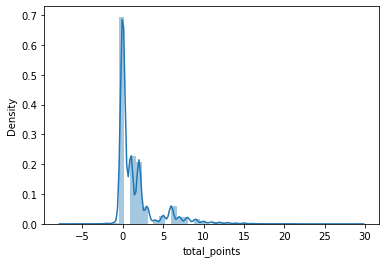

In [9]:
sns.distplot(df['total_points'])

We can see that there are a large amount of 0 total_points entries, we need to check if this is because they did not play any minutes.

In [10]:
print('Not Played: ', len(df[df['minutes']==0]))
print('Played: ', len(df[df['minutes']!=0]))
print('% Not Played: ', len(df[df['minutes']==0])/len(df)*100,'%')

Not Played:  39046
Played:  42680
% Not Played:  47.7767173237403 %


We need to remove 47.7% of our data points... not good!

In [11]:
df = df[df['minutes']!=0]
df.head()

,Season,name,position,team,total_points,bps,influence,goals_scored,ict_index,bonus,threat,minutes,creativity,assists,value,clean_sheets,selected
0,2021-22,David de Gea,GK,Man Utd,2,17,34.4,0,3.4,0,0.0,90,0.0,0,50,0,473518
4,2021-22,Alex Nicolao Telles,DEF,Man Utd,1,12,13.8,0,4.4,0,4.0,90,26.3,0,50,0,9011
9,2021-22,Gabriel Teodoro Martinelli Silva,MID,Arsenal,5,17,21.0,0,8.6,0,32.0,90,33.1,1,52,0,16436
11,2021-22,Alexandre Lacazette,FWD,Arsenal,1,3,0.2,0,0.0,0,0.0,11,0.0,0,83,0,96187
12,2021-22,Anthony Martial,FWD,Man Utd,1,3,0.0,0,0.0,0,0.0,2,0.0,0,76,0,50595


<AxesSubplot:>

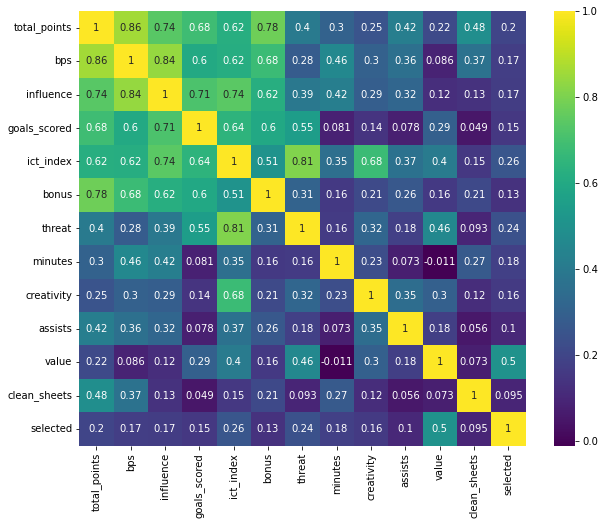

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

removing the zero minutes rows has affected the correlation of variables slightly but it is possible that before variables were over-correlated.

C:\Users\GV147BE\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_points', ylabel='Density'>

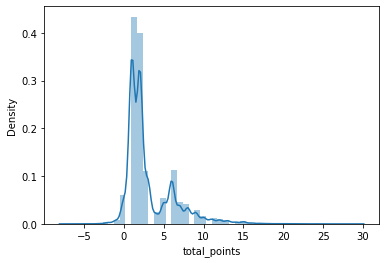

In [16]:
#let's look at our dist plot again
sns.distplot(df['total_points'])

In [18]:
df['total_points'].value_counts().sort_values()

 29        1
 26        1
-7         1
-6         1
-4         5
 24        6
 19       15
 20       16
 21       18
 18       25
-3        28
 17       40
 16       69
-2       106
 14      141
 15      168
 13      251
-1       265
 12      309
 11      366
 10      499
 4       753
 9       896
 8      1272
 7      1392
 5      1645
 0      1845
 3      3421
 6      3474
 2     12318
 1     13333
Name: total_points, dtype: int64

We can see that the most frequent score for an attacker is 1 point.

Let's investigate the relationship between price and total points to see if you get bang for your buck with attackers.

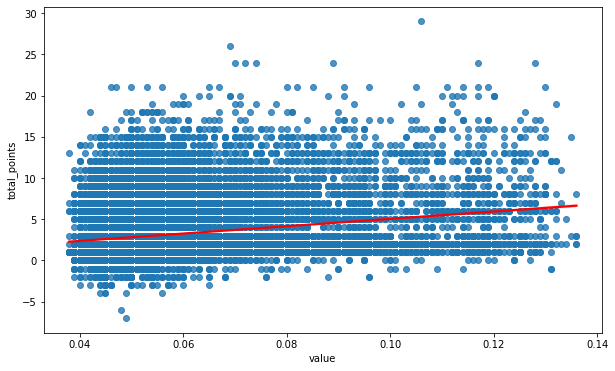

In [21]:
#scale the value column to reflect prices in the game
df['value'] = df['value'] / 10

plt.figure(figsize=(10,6))
sns.regplot(x='value',y='total_points',data=df, line_kws={"color": "red"})
plt.show()

As we can see there is very little correlation between value and total_points. 

To check this lets look at total_points per season for each attacker.

In [93]:
players = df[['name', 'Season', 'total_points', 'value']]
players.head()

,name,Season,total_points,value
0,Alex Nicolao Telles,2021-22,1,5.0
1,Takehiro Tomiyasu,2021-22,1,4.6
2,Harry Maguire,2021-22,1,5.4
3,Victor Lindelöf,2021-22,1,4.8
4,José Diogo Dalot Teixeira,2021-22,1,4.4


In [94]:
players = players.groupby(['name', 'Season']).agg({'total_points': 'sum', 'value': 'mean'})
players.reset_index(inplace=True)
players.sort_values(by='total_points')

,name,Season,total_points,value
431,Kayne Ramsay,2020-21,-3,4.000000
591,Neil Taylor,2020-21,-1,4.200000
238,Eric Bailly,2021-22,-1,4.900000
565,Michael Hector,2020-21,0,4.425000
30,Allan Tchaptchet,2020-21,0,4.000000
...,...,...,...,...
40,Andrew Robertson,2019-20,181,6.983333
750,Trent Alexander-Arnold,2018-19,185,5.262069
771,Virgil van Dijk,2018-19,208,6.281579
751,Trent Alexander-Arnold,2019-20,210,7.426316


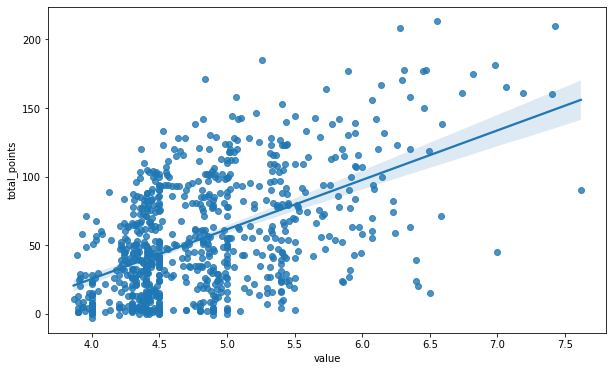

In [95]:
plt.figure(figsize=(10,6))
sns.regplot(x='value',y='total_points',data=players)
plt.show()

We can see that over the course of a season that there is an increase in total points with price. This indicates that is worth spending high on a few defenders if you can get it right!

Let's investigate if it matters which team you get your defenders from.

In [96]:
teams = df[['team', 'Season', 'total_points', 'value']]
teams.head()

,team,Season,total_points,value
0,Man Utd,2021-22,1,5.0
1,Arsenal,2021-22,1,4.6
2,Man Utd,2021-22,1,5.4
3,Man Utd,2021-22,1,4.8
4,Man Utd,2021-22,1,4.4


In [97]:
teams = teams.groupby(['team', 'Season']).agg({'total_points': 'sum', 'value': 'mean'})
teams.reset_index(inplace=True)
teams.sort_values(by='total_points')

,team,Season,total_points,value
81,Norwich,2017-18,5,4.200000
82,Norwich,2018-19,6,4.800000
88,Sheffield Utd,2018-19,22,4.328571
84,Norwich,2020-21,31,4.761538
110,West Brom,2018-19,43,3.890000
...,...,...,...,...
30,Chelsea,2020-21,718,5.223243
116,West Ham,2020-21,740,4.744907
58,Liverpool,2018-19,744,5.780851
64,Man City,2018-19,782,5.625373


C:\Users\GV147BE\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_points', ylabel='Density'>

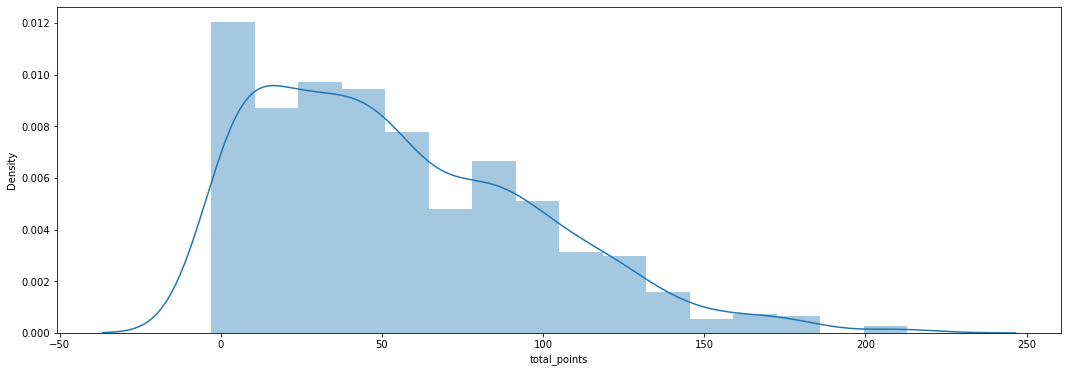

In [98]:
plt.figure(figsize=(18,6))
sns.distplot(players['total_points'])

It looks like that most teams defenders get a similar total over the course of a season, apart from a few. It could be worth considering backing historically good defences like Man City and Liverpool. 

Let's have a look at how stable the ict_index variable is, as when inputting to the model we will have to predict this by aggregating player past performance.

C:\Users\GV147BE\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ict_index', ylabel='Density'>

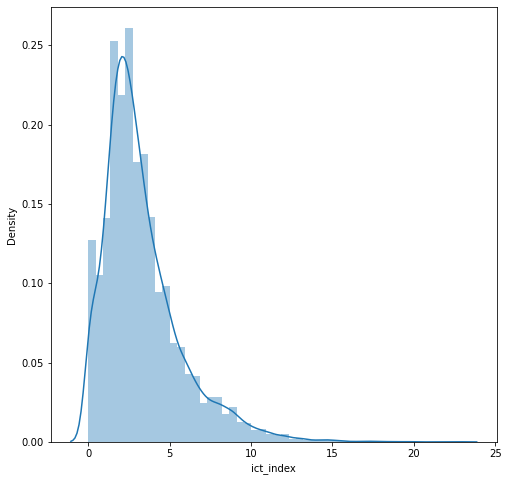

In [99]:
plt.figure(figsize=(8,8))
sns.distplot(df['ict_index'])

This variable has a normal distribution this could mean it has good discriminatory power so we will leave this variable in.

Let's have a look at selected vs total_points, i.e. are the general public good at choosing defenders?

<AxesSubplot:xlabel='total_points', ylabel='selected'>

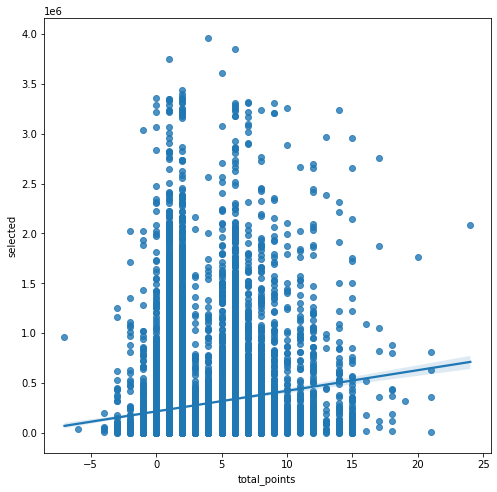

In [100]:
plt.figure(figsize=(8,8))
sns.regplot(x='total_points', y='selected', data=df)

There is a slight correlation but in general the public is not good at selecting defenders.

Finally let's look at saves vs bps

<AxesSubplot:xlabel='bps', ylabel='total_points'>

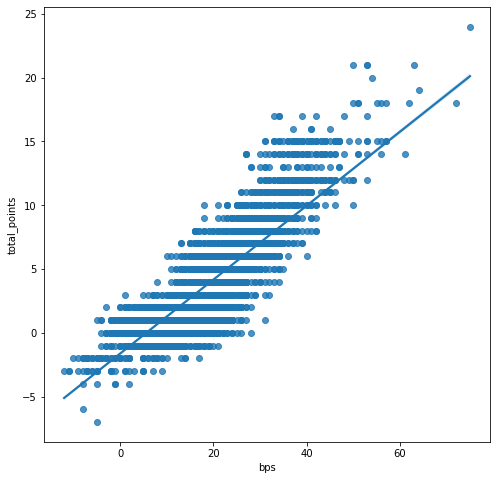

In [101]:
plt.figure(figsize=(8,8,))
sns.regplot(x='bps', y='total_points', data=df)

As expected this shows good correlation. This is interesting as it is such a powerful predictor but there are only 3 players per match that receive bonus points.

<h1>Let's save the datasets again based on what we found out</h1>

In [102]:
data_path = os.getcwd() + "\Data\Transformed_Data"

defenders_correlated = pd.read_csv(data_path + "\\defenders_correlated.csv")
defenders_correlated = defenders_correlated[defenders_correlated['minutes']!=0]
defenders_correlated.to_csv(data_path + "\\defenders_correlated.csv", index=False)

defenders = pd.read_csv(data_path + "\\defenders.csv")
defenders = defenders[defenders['minutes']!=0]
defenders.to_csv(data_path + "\\defenders.csv", index=False)

print(len(defenders_correlated))
print(len(defenders))

14645
14645
